# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix,
    RocCurveDisplay,
    roc_auc_score
)

# Load data

In [3]:
data = load_wine()
X = data.data
y = data.target

# Analyze the data size and first few rows

print(f"Data shape: {X.shape}")
print(f"Feature names: {data.feature_names}")
print(f"First few rows of the data: {X[:5]}")

Data shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
First few rows of the data: [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


# Split into train/test

In [4]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=1, 
    stratify=y
)

# Pipeline

In [5]:
# Create a pipeline with a StandardScaler and a LogisticRegression model

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=1))
])

# Hyperparameter tuning

In [6]:
# Fit the pipeline to the training data

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,            
    scoring='accuracy',
    n_jobs=-1
)


# Fit the model

In [7]:
# Fit the grid search to the training data

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters found: {'logreg__C': 0.1}
Best cross-validation score: 0.979


# Evaluate

In [8]:
# Evaluate the model on the test set

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nTest Set Accuracy: {:.3f}".format(acc))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Test Set Accuracy: 1.000

Classification Report (Test Set):
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# Plot

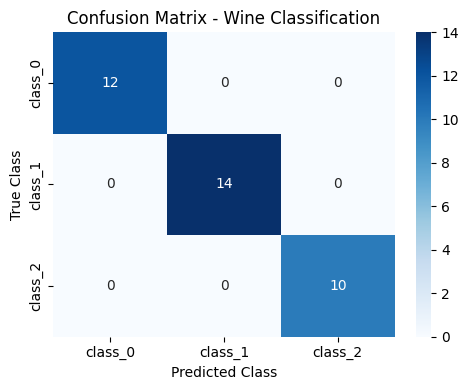

In [9]:
# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Wine Classification")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

### As we can see, the model accurately predicted everything with 100% accuracy. Probably its because the dataset was very small.